In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras import utils
from keras.layers import Dense

In [3]:
max_features =10000
maxlen =500
batch_size =32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data( num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = utils.pad_sequences(input_train, maxlen=maxlen)
input_test = utils.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 82ms/step - loss: 0.6358 - acc: 0.6196 - val_loss: 0.5373 - val_acc: 0.7436
Epoch 2/10
157/157 [==============================] - 13s 83ms/step - loss: 0.4358 - acc: 0.8081 - val_loss: 0.4398 - val_acc: 0.8054
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 0.3286 - acc: 0.8659 - val_loss: 0.3815 - val_acc: 0.8458
Epoch 4/10
157/157 [==============================] - 14s 89ms/step - loss: 0.2751 - acc: 0.8924 - val_loss: 0.4018 - val_acc: 0.8396
Epoch 5/10
157/157 [==============================] - 14s 86ms/step - loss: 0.2166 - acc: 0.9185 - val_loss: 0.3970 - val_acc: 0.8520
Epoch 6/10
157/157 [==============================] - 14s 86ms/step - loss: 0.1644 - acc: 0.9405 - val_loss: 0.4415 - val_acc: 0.8496
Epoch 7/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1177 - acc: 0.9596 - val_loss: 0.5133 - val_acc: 0.8176
Epoch 8/10
157/157 [==============================] - 14s 88ms

In [6]:
predicted_classes = model.predict(input_test)
import numpy as np
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

782/782 [==============================] - 10s 13ms/step


((25000,), (25000,))

In [7]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels"%len(correct))

Found 12500 correct labels


In [8]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels"%len(incorrect))

Found 12500 incorrect labels


In [9]:
from sklearn.metrics import classification_report
num_classes=2
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67     12500
     Class 1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



Y:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Y:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Y:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


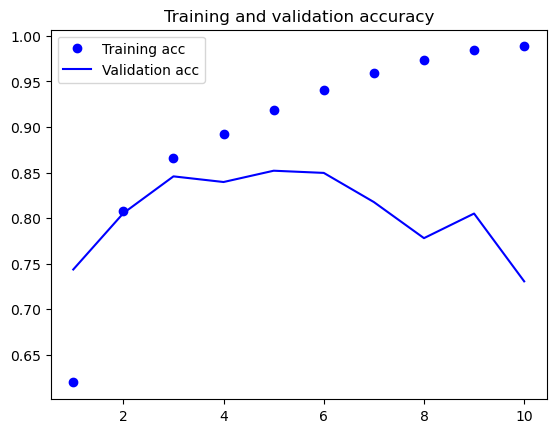

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs =range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

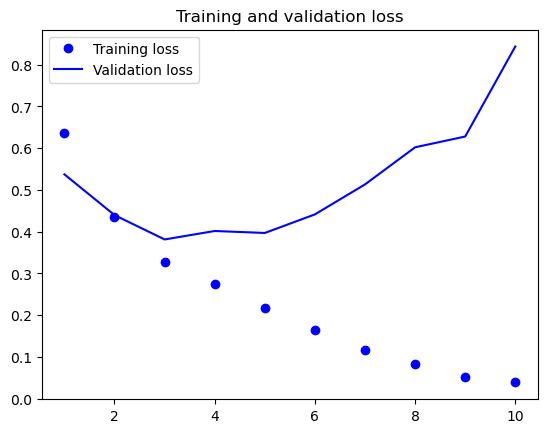

In [11]:
plt.figure()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =range(1, len(acc) +1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()